In [1]:
import pandas as pd, numpy as np, re
import matplotlib.pyplot as plt
import glob
from datetime import datetime, date
import json
import seaborn as sns

## Description Text File

In [2]:
path = "Analysis/*.txt"
txtfiles = glob.glob(path)
sorted(txtfiles)

['Analysis/project_description_0_500.txt',
 'Analysis/project_description_10000_10500.txt',
 'Analysis/project_description_1000_1500.txt',
 'Analysis/project_description_10500_11000.txt',
 'Analysis/project_description_11000_11500.txt',
 'Analysis/project_description_11500_12000.txt',
 'Analysis/project_description_12000_12032.txt',
 'Analysis/project_description_1500_2000.txt',
 'Analysis/project_description_2000_2500.txt',
 'Analysis/project_description_2500_3000.txt',
 'Analysis/project_description_3000_3500.txt',
 'Analysis/project_description_3500_4000.txt',
 'Analysis/project_description_4000_4500.txt',
 'Analysis/project_description_4500_5000.txt',
 'Analysis/project_description_5000_5500.txt',
 'Analysis/project_description_500_1000.txt',
 'Analysis/project_description_5500_6000.txt',
 'Analysis/project_description_6000_6500.txt',
 'Analysis/project_description_6500_7000.txt',
 'Analysis/project_description_7000_7500.txt',
 'Analysis/project_description_7500_8000.txt',
 'Analys

In [3]:
num = [int(i) for i in np.linspace(0, 11500, 24)]
numfile = [[str(i), str(i+500)] for i in num] + [['12000', '12032']]

In [4]:
txtfiles = []
for i in numfile:
    txtfiles.append('Analysis/project_description_'+i[0]+'_'+i[1]+'.txt')

In [5]:
text = ''
for name in txtfiles:
    with open(name) as file:
        for line in file:
            text = text + line

In [6]:
new_text = re.split("([0-9]+\|)", text)

In [7]:
new_text = new_text[1:]

In [8]:
index = [ele.strip("|") for ele in new_text if re.findall(r"[0-9]+\|", ele) != []]

In [9]:
twoDarray = []
number = [i for i in range(len(new_text)) if i % 2 == 0]
for n in number:
    twoDarray.append([int(new_text[n].strip("|")), new_text[n+1]])

In [10]:
set([int(i) for i in index]).__len__()

12032

In [11]:
table = pd.DataFrame(twoDarray, columns = ["Index", "Description"])

In [12]:
table[table["Index"].duplicated()]

,Index,Description
1378,4,1TB HDD | 240GB SSD | Windows 10 Home 64-bit ...
5526,0,", True Quick Detach System, Made in the USAPro..."
5527,0,AR15 TacticalWhen seconds countWe know what's...
9492,18,1 Apr. 18- Start App Development (Adap) •\t1 ...


### Find one index befind or after the duplicated index

In [13]:
table.iloc[5524:5529, :]

,Index,Description
5524,5523,A Classic Analog Subtractive Synthesis sou...
5525,5524,Protect your investment; your hunt and your ex...
5526,0,", True Quick Detach System, Made in the USAPro..."
5527,0,AR15 TacticalWhen seconds countWe know what's...
5528,5525,"Faradeus is a flashlight, machined from aircra..."


In [14]:
table.iloc[5525, 1] = table.iloc[5525, 1] + str(table.iloc[5526, 0]) + '|' + table.iloc[5526, 1] + str(table.iloc[5527, 0]) + '|' + table.iloc[5527, 1]

In [15]:
table.drop([5526, 5527], axis = 0, inplace = True)
table.reset_index(drop = True, inplace = True)

### Check rest of duplicated

#### Index 1378

In [16]:
table[table["Index"].duplicated()]

,Index,Description
1378,4,1TB HDD | 240GB SSD | Windows 10 Home 64-bit ...
9490,18,1 Apr. 18- Start App Development (Adap) •\t1 ...


In [17]:
table.iloc[1377, 1] = table.iloc[1377, 1] + str(table.iloc[1378, 0]) + ' |' + table.iloc[1378, 1]


In [18]:
table.drop(1378, axis = 0, inplace = True)
table.reset_index(drop = True, inplace = True)

### Index 9492

In [19]:
table[table["Index"].duplicated()]

,Index,Description
9489,18,1 Apr. 18- Start App Development (Adap) •\t1 ...


In [20]:
table.loc[9488:9490, :]

,Index,Description
9488,9488,My wife Esraa and I were had a discussion a fe...
9489,18,1 Apr. 18- Start App Development (Adap) •\t1 ...
9490,9489,\n


In [21]:
table.iloc[9488, 1] = table.iloc[9488, 1] + str(table.iloc[9489, 0]) + '|' + table.iloc[9489, 1]

In [22]:
table.drop(9489, axis = 0, inplace = True)
table.reset_index(drop = True, inplace = True)

In [23]:
table.head()

,Index,Description
0,0,We want that in 'shareit.' You can share every...
1,1,Because it's fun:Baking contests have been aro...
2,2,Ask any artist what makes art both beautiful a...
3,3,We have internally discussed how we can show o...
4,4,JEDEYE is a stylish stereoscopic camera design...


## JSON

In [26]:
table.to_json("Description.json", orient = "records")

## Read CSV

In [160]:
table.shape

(12032, 2)

In [212]:
num = [int(i) for i in np.linspace(0, 11500, 24)]
numfile = [[str(i), str(i+500)] for i in num] + [['12000', '12032']]
csvfiles = []
for i in numfile:
    csvfiles.append('Analysis/project_scraped_'+i[0]+'_'+i[1]+'.csv')

In [195]:
csv_data = []
for name in csvfiles:
    csv_data.append(pd.read_csv(name))

In [214]:
csv_table = pd.read_csv('Analysis/project_scraped_12000_12032.csv')

In [218]:
csv_table["Description"] = table["Description"]

In [222]:
csv_table["HasDescription"] = [1 if i != "\n" else 0 for i in csv_table["Description"]]

In [237]:
csv_table[csv_table["HasDescription"] == 1].shape

(6251, 22)

In [239]:
list(csv_table[csv_table["HasDescription"] == 0]["url"])

['https://www.kickstarter.com/projects/sandee/sandee-choose-your-beach?ref=discovery_category_newest',
 'https://www.kickstarter.com/projects/680106154/vendordine?ref=discovery_category_newest',
 'https://www.kickstarter.com/projects/polyshaper/polyshaper-oranje-high-precision-foam-cutting-mach?ref=discovery_category_newest',
 'https://www.kickstarter.com/projects/445096737/youarenotalone?ref=discovery_category_newest',
 'https://www.kickstarter.com/projects/707054749/pyduino-arduino-the-python-way?ref=discovery_category_newest',
 'https://www.kickstarter.com/projects/donskotnicki/ettore-bikes-most-affordable-folding-ebike-on-eart?ref=discovery_category_newest',
 'https://www.kickstarter.com/projects/minkisan/unity-a-content-creators-toolkit?ref=discovery_category_newest',
 'https://www.kickstarter.com/projects/ibmirror/art-mirror-by-ibmirror?ref=discovery_category_newest',
 'https://www.kickstarter.com/projects/121765932/openvr-walkinplace?ref=discovery_category_newest',
 'https://www

## JSON

In [5]:
from collections import Counter

In [2]:
data = []
with open("Analysis/Kickstarter_Tech.json", "r") as json_file:
    for line in json_file:
        data.append(json.loads(line))

df = pd.DataFrame([list(ele.values()) for ele in data], columns = list(data[0].keys()))

In [3]:
df.head(2)

,backers_count,blurb,converted_pledged_amount,country,created_at,currency,deadline,goal,id,launched_at,name,staff_pick,state,usd_pledged,mainCategory,subCategory,creatorID,url
0,2,We want that in 'shareit.' You can share every...,37,ES,2018-02-22,EUR,2018-05-05,20000.0,2381452,2018-03-21,shareit. - Share. Find. Live. Do everything.,0,failed,38.27084912,technology,Apps,925162838,https://www.kickstarter.com/projects/925162838...
1,0,"infrastructure for organizing, competing-in, a...",0,US,2017-07-28,USD,2017-08-27,5000.0,58029739,2017-07-28,Online contest for baked goods,0,failed,0.0,technology,Web,1790458719,https://www.kickstarter.com/projects/getfreshb...


In [19]:
country_count = Counter(df["country"]).items()
country_count

dict_items([('ES', 290), ('US', 6757), ('DE', 577), ('CA', 680), ('MX', 238), ('FR', 379), ('JP', 63), ('NL', 202), ('AT', 94), ('GB', 976), ('IE', 65), ('IT', 409), ('AU', 391), ('SE', 79), ('NO', 45), ('CH', 144), ('SG', 109), ('HK', 324), ('NZ', 72), ('BE', 63), ('DK', 68), ('LU', 7)])

In [22]:
#plt.pie([val for name, val in country_count], labels = [name for name, val in country_count])

In [23]:
sum(df["country"] == "US") / len(df["country"])

0.5615857712765957

([<matplotlib.patches.Wedge at 0x7fb5d3a31940>,
 [Text(0.9435014710002994, 0.5655130186125439, 'Apps'),
  Text(0.07433160264095319, 1.0974856777420048, 'Web'),
  Text(-0.6821755839764873, 0.8629232136327885, 'Hardware'),
  Text(-1.0948707659886423, 0.10610375009133305, 'Gadgets'),
  Text(-0.976138910972696, -0.507102382645792, 'Camera Equipment'),
  Text(-0.8240500425035336, -0.7286573457050471, 'DIY Electronics'),
  Text(-0.4747197967805642, -0.9922908417115518, 'Wearables'),
  Text(-0.1335114430630078, -1.0918675261089292, 'Technology'),
  Text(0.1203880055430755, -1.0933923029367643, 'Sound'),
  Text(0.58290577726546, -0.9328562884123953, 'Software'),
  Text(0.900004323136293, -0.6324493800581857, '3D Printing'),
  Text(0.9795589399057472, -0.5004640678917209, 'Fabrication Tools'),
  Text(1.0368544973113285, -0.36733193627191296, 'Robots'),
  Text(1.0742698353068942, -0.23652551860147936, 'Makerspaces'),
  Text(1.090223481155598, -0.14633099855112677, 'Space Exploration'),
  Text(1.

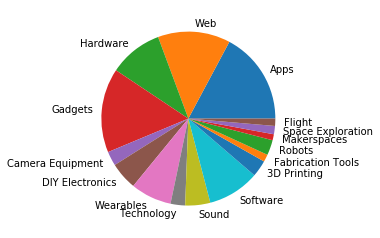

In [6]:
sub_count = Counter(df["subCategory"]).items()
plt.pie([val for name, val in sub_count], labels = [name for name, val in sub_count])

In [7]:
sub_count

dict_items([('Apps', 2068), ('Web', 1621), ('Hardware', 1200), ('Gadgets', 1884), ('Camera Equipment', 321), ('DIY Electronics', 617), ('Wearables', 917), ('Technology', 326), ('Sound', 560), ('Software', 1159), ('3D Printing', 372), ('Fabrication Tools', 165), ('Robots', 340), ('Makerspaces', 134), ('Space Exploration', 185), ('Flight', 163)])

### Month

In [10]:
df["month"] = df["launched_at"].apply(lambda x: x.split("-")[1])

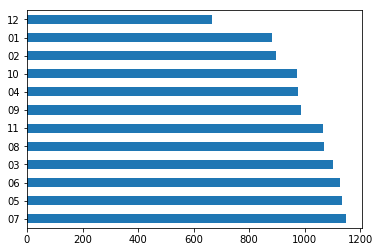

In [15]:
df["month"].value_counts().plot(kind='barh', )

### Goal

(array([1.1972e+04, 3.3000e+01, 1.0000e+01, 1.0000e+00, 8.0000e+00,
        2.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.00000000e+00, 2.00000098e+06, 4.00000096e+06, 6.00000094e+06,
        8.00000092e+06, 1.00000009e+07, 1.20000009e+07, 1.40000009e+07,
        1.60000008e+07, 1.80000008e+07, 2.00000008e+07, 2.20000008e+07,
        2.40000008e+07, 2.60000007e+07, 2.80000007e+07, 3.00000007e+07,
        3.20000007e+07, 3.4000

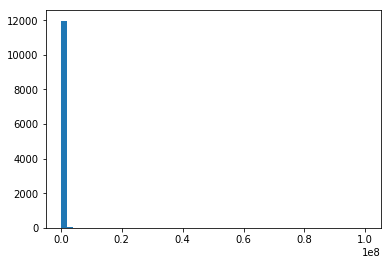

In [19]:
plt.hist(df["goal"], bins = 50)

In [21]:
df["goal"].describe()

count    1.203200e+04
mean     9.448733e+04
std      1.091701e+06
min      1.000000e+00
25%      5.500000e+03
50%      2.000000e+04
75%      5.000000e+04
max      1.000000e+08
Name: goal, dtype: float64

(array([437.,  32.,  10.,   2.,   2.,   8.,   0.,   2.,   1.,   1.]),
 array([  252100. ,  2113461.5,  3974823. ,  5836184.5,  7697546. ,
         9558907.5, 11420269. , 13281630.5, 15142992. , 17004353.5,
        18865715. ]),
 <a list of 10 Patch objects>)

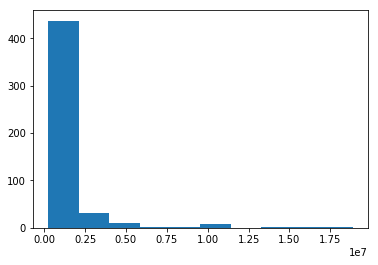

In [53]:
plt.hist(df[(df["goal"] > 250000) & (df["goal"] < 30000000)]["goal"])

(array([ 23., 164.,  78.,  88., 153., 124.,  35.,  46.,  26.,  20.]),
 array([55500. , 59949.9, 64399.8, 68849.7, 73299.6, 77749.5, 82199.4,
        86649.3, 91099.2, 95549.1, 99999. ]),
 <a list of 10 Patch objects>)

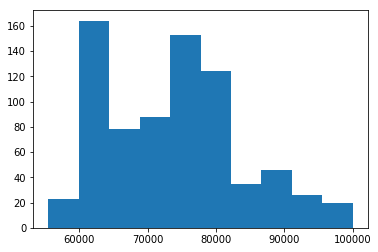

In [38]:
plt.hist(df[(df["goal"] > 55000) & (df["goal"] < 100000)]["goal"])

(array([ 78., 174.,  71.,  97., 159., 125.,  36.,  46.,  27.,  20.]),
 array([50700. , 55629.9, 60559.8, 65489.7, 70419.6, 75349.5, 80279.4,
        85209.3, 90139.2, 95069.1, 99999. ]),
 <a list of 10 Patch objects>)

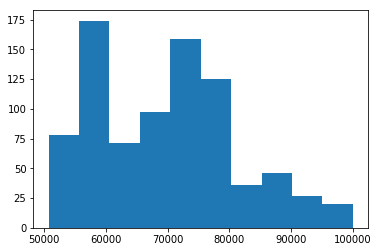

In [33]:
plt.hist(df[(df["goal"] > 5*10**4) & (df["goal"] < 10**5)]["goal"])